In [8]:
import os
from datetime import datetime
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
survey = pd.read_csv('Data/survey.csv')

In [10]:
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 12:03,27.0,Female,United States,NY,Yes,No,Yes,Often,05-Jan,...,Very easy,Maybe,Maybe,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 22:55,30.0,Female,United States,WI,Yes,Yes,Yes,Often,05-Jan,...,Somewhat difficult,No,No,Yes,Yes,No,No,Yes,No,Because I'm self-employed and the only person ...
2,2014-08-27 12:11,29.0,Female,United States,FL,No,No,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,Some of them,No,Maybe,No,Yes,NaN
3,2014-08-27 12:15,25.0,Female,Canada,NaN,No,No,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
4,2014-08-27 12:44,25.0,Female,United States,NY,No,Yes,Yes,Sometimes,500-1000,...,Don't know,Yes,Yes,Some of them,Some of them,No,No,Don't know,No,NaN


# Data Cleaning

In [11]:
# removing columns not useful for our analysis
survey.drop(['state','Timestamp'], axis= 1,inplace = True)

In [12]:
# the NaN values of the "self_employed" column will be filled with the largely dominant value: "No"
survey['self_employed'].fillna('No',inplace = True)
survey['self_employed'].value_counts()

No     1113
Yes     146
Name: self_employed, dtype: int64

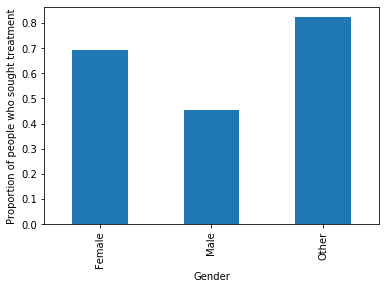

In [13]:
survey.replace(('Yes', 'No'), (1, 0), inplace=True)
gender_pivot = survey.pivot_table(index="Gender",values="treatment")
gender_pivot.plot.bar()
plt.ylabel("Proportion of people who sought treatment")
plt.legend().set_visible(False)
plt.show()

In [14]:
survey["Age"].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [15]:
# Some values in the "Age" column are not realistic or completely no sense (like negative values or positive values above 150).
#Values not between 18 and 73 will be filled by the median value of the column.
survey['Age'][survey['Age']<18] = survey['Age'].median()
survey['Age'][survey['Age']>73] = survey['Age'].median()